In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('./train_data.csv')

In [37]:
df2 = pd.concat([df['quality'],df['Total.Cup.Points']],axis=1)
df2

,quality,Total.Cup.Points
0,excellent,82.83
1,excellent,83.17
2,excellent,82.08
3,excellent,84.50
4,excellent,82.25
...,...,...
1239,very good,79.75
1240,very good,79.50
1241,very good,78.75
1242,very good,78.67


In [38]:
df3 = pd.get_dummies(df2)
df3

,Total.Cup.Points,quality_excellent,quality_very good
0,82.83,1,0
1,83.17,1,0
2,82.08,1,0
3,84.50,1,0
4,82.25,1,0
...,...,...,...
1239,79.75,0,1
1240,79.50,0,1
1241,78.75,0,1
1242,78.67,0,1


In [39]:
df3['quality_very good']

0       0
1       0
2       0
3       0
4       0
       ..
1239    1
1240    1
1241    1
1242    1
1243    1
Name: quality_very good, Length: 1244, dtype: uint8

In [40]:
df4 = pd.DataFrame(df3['Total.Cup.Points'])
df4

,Total.Cup.Points
0,82.83
1,83.17
2,82.08
3,84.50
4,82.25
...,...
1239,79.75
1240,79.50
1241,78.75
1242,78.67


In [41]:
df3.loc[df3['quality_very good'] > 0.5, 'quality_very good'] -= 0.5
df3

,Total.Cup.Points,quality_excellent,quality_very good
0,82.83,1,0.0
1,83.17,1,0.0
2,82.08,1,0.0
3,84.50,1,0.0
4,82.25,1,0.0
...,...,...,...
1239,79.75,0,0.5
1240,79.50,0,0.5
1241,78.75,0,0.5
1242,78.67,0,0.5


In [42]:
df3['quality_excellent']+df3['quality_very good']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1239    0.5
1240    0.5
1241    0.5
1242    0.5
1243    0.5
Length: 1244, dtype: float64

In [43]:
df4

,Total.Cup.Points
0,82.83
1,83.17
2,82.08
3,84.50
4,82.25
...,...
1239,79.75
1240,79.50
1241,78.75
1242,78.67


In [44]:
df4['quality'] = df3['quality_excellent']+df3['quality_very good']
df4

,Total.Cup.Points,quality
0,82.83,1.0
1,83.17,1.0
2,82.08,1.0
3,84.50,1.0
4,82.25,1.0
...,...,...
1239,79.75,0.5
1240,79.50,0.5
1241,78.75,0.5
1242,78.67,0.5


In [64]:
df4['Total.Cup.Points'] = (df4['Total.Cup.Points'] - df4['Total.Cup.Points'].mean()) / df4['Total.Cup.Points'].std()
df4

,Total.Cup.Points,quality
0,0.726258,1.0
1,0.815887,1.0
2,0.528546,1.0
3,1.166495,1.0
4,0.573361,1.0
...,...,...
1239,-0.085677,0.5
1240,-0.151581,0.5
1241,-0.349292,0.5
1242,-0.370381,0.5


In [65]:
df4.sort_values('quality')
df4.head(5)

,Total.Cup.Points,quality
0,0.726258,1.0
1,0.815887,1.0
2,0.528546,1.0
3,1.166495,1.0
4,0.573361,1.0


In [66]:
df4.tail(5)

,Total.Cup.Points,quality
1239,-0.085677,0.5
1240,-0.151581,0.5
1241,-0.349292,0.5
1242,-0.370381,0.5
1243,-0.723626,0.5


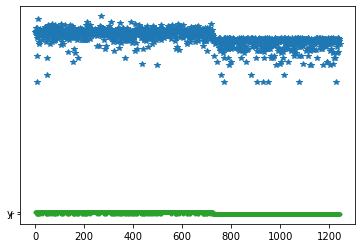

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# plt.plot(range(0,1244),np.zeros(1244)+0.5,'o')
plt.plot(range(0,1244),df3['Total.Cup.Points'],'*','r')
plt.plot(range(0,1244),df3['quality_excellent'],'.','y')

In [ ]:
df4